In [47]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Let's talk about things
---

To start off—how was the midterm?  Any questions?

In [ ]:
"""A new table with same columns but with only
one row for each of the most expensive product
of each material"""

In [ ]:
# Most expensive of each material
inventory.sort("Price", descending=True)
# Only keep the first occurence of each material
inventory.sort("Material", distinct=True)

Alright, let's get to the fun stuff!

# Probability
---

In [ ]:
# What is a measure of probability?

```
The chance that something happens.
How likely something is to happen.
```

In [ ]:
# How do we find a probability in general?

```
# of possibilities of success / # of total possibilities


We define success in the context of a problem.  E.g. "Tails" on a coin flip.
```

In [ ]:
# How do we calculate probability via experimentation or simulation?

```
We repeat trials and keep track of:
How many successes we found, and how many trials we did.

Probability(some event) = # of successes / # of trials
```

# Time for some math :)
---

Let's look, just a bit, into the math behind probabilities.

In [3]:
# If P(some event) = 0.4, and the events are independent then
# what is P(some event happens twice)?

prob_some = 0.4
prob_some_twice = 0.4 * 0.4
prob_some_twice

0.16000000000000003

In [4]:
# If P(some event) = 0.4, P(another event) = 0.2, and the events are independent then
# what is P(some event happens then another event happens)?

prob_another = 0.2

prob_some_another = prob_some * prob_another
prob_some_another

0.08000000000000002

In [5]:
# What about P(another events happens then some event happens)?

prob_some_another
# Order of multiplication doesn't matter.

0.08000000000000002

```
In general, if some collections of events are independent, then the probability of all of them happening is just their probabilities multiplied.
```

In [6]:
# Finally, if our outcome can either be some event, another event, or a cool event
# then what must P(cool event) equal? Assume the events are mutually exclusive (disjoint)

some_event = 0.4
another_event = 0.2
cool_event = 1 - some_event - another_event

cool_event

0.39999999999999997

# Let's *make* a dataset!
---

In tonight's discussion we'll be creating our datasets instead of downloading them!

We'll be coming up with games and creating the rules, and then simulating matches to generate a dataset.

In [ ]:
# We'll cover more later, but first let's create a game and a dataset to go with it.
#
# Ex. You roll a die and flip a coin
# write down the roll * 1 if heads or the roll * 2 if tails

In [ ]:
# OUR GAME:

# Choose one of 5 fruits
# then
# Checking if it's raining
#
# If you picked a guava and it's raining => +4 points

# See how this is pretty much the same as the example?

In [ ]:
# Let's create a dataset that contains every possible outcome
# why is this helpful?

```
By finding every possible outcome and roll and flip that generated the outcome, we find the probability of each outcome occurring.
```

In [7]:
Table().with_columns(
    "Roll", [],
    "Flip", [],
    "Score", []
)

Roll,Flip,Score


In [ ]:
# What logic should we use to populate our columns?
#
# I think I'd like to use some loops to create the roll and flip columns,
# and then we can calculate the score column afterwards

In [8]:
rolls = make_array()
flips = make_array()

# Each time I play I roll a die
for roll in np.arange(1, 7):
    # Each time I play I flip a coin
    for flip in np.arange(2):
        rolls = np.append(rolls, roll)
        flips = np.append(flips, flip)

In [9]:
possibilities = Table().with_columns(
    "Roll", rolls,
    "Flip", flips
)
possibilities

Roll,Flip
1,0
1,1
2,0
2,1
3,0
3,1
4,0
4,1
5,0
5,1


In [ ]:
# Now we should add the "Score" column,
# how do we do this?

In [ ]:
...

In [11]:
possibilities = possibilities.with_column(
    "Score", possibilities.column("Roll") * (possibilities.column("Flip") + 1)
)
possibilities.show()

Roll,Flip,Score
1,0,1
1,1,2
2,0,2
2,1,4
3,0,3
3,1,6
4,0,4
4,1,8
5,0,5
5,1,10


# Let's look at the distribution of scores
---

We want to figure out the exact probability of all possible scores of the game are, based on all possible rolls and flips.

Finally `normed=True` is useful!

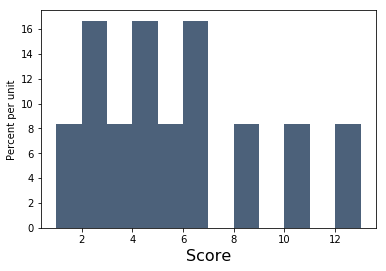

In [14]:
# Let's make the bins of this histogram go from min to max ;) 
possibilities.hist(
    "Score",
    bins = np.arange(
        min(possibilities.column("Score")),
        max(possibilities.column("Score")) + 2,
        1
    )
)

# Histogram bins INCLUDE the lower bound, and EXCLUDE the upper bound

# So the bins [1, 2), [2, 3)

In [15]:
# Let's save those bins for the future
bins = np.arange(min(possibilities.column("Score")), max(possibilities.column("Score")) + 2)

In [16]:
# I also want to print out all of the probabilities for reference

for value in np.unique(possibilities.column("Score")):
    print(value, '\t', possibilities.where("Score", value).num_rows / possibilities.num_rows)

1.0 	 0.08333333333333333
2.0 	 0.16666666666666666
3.0 	 0.08333333333333333
4.0 	 0.16666666666666666
5.0 	 0.08333333333333333
6.0 	 0.16666666666666666
8.0 	 0.08333333333333333
10.0 	 0.08333333333333333
12.0 	 0.08333333333333333


# Distributions: a quick aside
---

In [ ]:
# What kind of distribution did we plot above?

```
A probability distribution!  The actual probabilities!
```

In [ ]:
# What other type of distribution is there, and how do we find it?

```
Empirical/experimental distribution.  Comes from what we observe.
```

# Let's simulate our game
---

Say I wanted to simulate matches of the game we defined above.

In [17]:
# We could write a function
def simulate():
    roll = np.random.choice(np.arange(1, 7))
    flip = np.random.choice(np.arange(1, 3))
    return roll * flip

# And use it a bunch of times
trials = 10000
results = make_array()

for i in np.arange(trials):
    results = np.append(results, simulate())
    
results

array([12.,  1.,  5., ...,  1.,  5.,  2.])

In [ ]:
# But... this seems familiar.  Have we seen these "simulations" before?

```
Every possible outcome is already in our table of `possibilities`.
```

In [ ]:
# So, what does that mean we can do instead of simulating?

```
We can just sample from `possibilities`!
```

# Sampling
---

Sampling is a way of getting a subset of population.

In [ ]:
# What do we use sampling for?

```
We use sampling (taking a subset of the population) to try to understand the whole population (without being able to access the whole population).
```

In [ ]:
# What kinds of sampling are there?
#
# Well... that was very vague.  Let's find some through examples

In [22]:
# If we take every row with a score of 6
# what type of sampling is this?

possibilities.where("Score", 6)

Roll,Flip,Score
3,1,6
6,0,6


```
"Deterministic".  Meaning: it's not at all random, we get the same thing every time.
```

In [28]:
# If we sample a random selection of 5 rows
# what type of sampling is this?

possibilities.sample(5)

Roll,Flip,Score
5,1,10
3,0,3
2,1,4
3,1,6
3,0,3


```
A random sample.  It is also with replacement.
```

In [33]:
# But we still need to be careful, because what about this?

possibilities.sample(5, with_replacement=False)

Roll,Flip,Score
5,0,5
4,0,4
2,0,2
3,1,6
1,1,2


In [34]:
# What happens if we want to sample 100 matches?

possibilities.sample(100)

Roll,Flip,Score
3,1,6
3,1,6
6,0,6
4,0,4
3,0,3
6,1,12
3,1,6
3,0,3
5,1,10
4,1,8


In [38]:
# What if we sample the first 5 rows that we see?
# Is this not the same as simulating 5 times?
# What kind of sampling is this?

possibilities.take(np.arange(5))

Roll,Flip,Score
1,0,1
1,1,2
2,0,2
2,1,4
3,0,3


```
It's deterministic.  It's convenient.
```

In [39]:
# Okay, what if we shuffle the possibilities, and then pick the first 5?
# Should be fine, right?
#
# Don't worry about this first line of code, it's just putting all rows into a list
rows = [possibilities.row(i) for i in np.arange(possibilities.num_rows)]

np.random.shuffle(rows)

shuffled = Table(["Roll", "Flip", "Score"]).with_rows(
    rows
)
shuffled

Roll,Flip,Score
1,1,2
2,0,2
6,1,12
4,1,8
6,0,6
5,1,10
1,0,1
3,0,3
4,0,4
3,1,6


```
It's random, but without replacement.
```

In [ ]:
# What conditions must be satisfied for accurate sampling?

```
Needs to be random.
```

# What do we mean by "accurate" sampling?
---

I'm glad you asked!

In [ ]:
# Recall that sampling is a way for us to discover things about
# a population when we don't have access to that population.
#
# So by that logic, an "accurate" sample would mean...

```
An accurate sample is able to accurately predict the population.
```

In [ ]:
# Law of Large Numbers
#
# As long as we satisfy the conditions for an accurate sample
# then we know that:

# As the number of samples increases, the distribution of sample results
# will approach the true distribution of the population

# In other words,
# the empirical distribution will get closer to the probability distribution

In [ ]:
# Let's verify this ourselves

In [42]:
# We can define a simulate function
def simulate(num):
    return possibilities.sample(num).column("Score")

In [43]:
simulate(5)

array([3., 4., 8., 6., 6.])

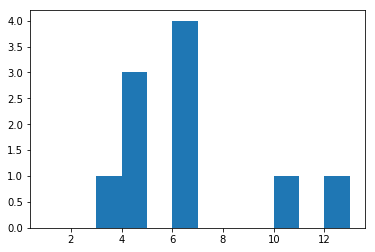

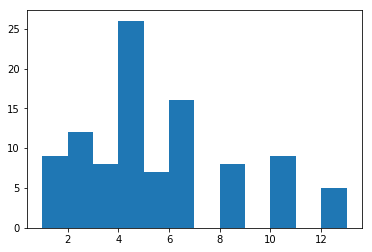

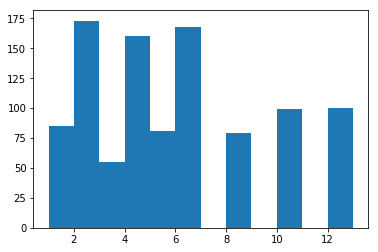

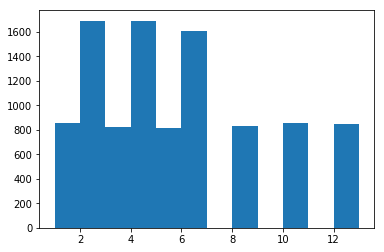

In [45]:
for samples in [10, 100, 1000, 10000]:
    plt.hist(simulate(samples), bins=bins)
    plt.show()

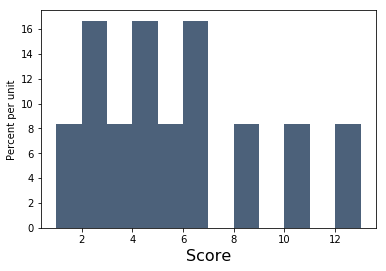

In [46]:
possibilities.hist("Score", bins=bins)

In [ ]:
# Do you remember which distribution is which?

```
The top distributions were: empirical
The bottom distribution was: probability
```

# Sample statistics
---

In addition to the distribution of sample results approaching the true distribution, the average of sample statistics will approach the true population statistic.

In [ ]:
# What's a sample statistic?

```
A measurement of the sample, like the mean, median, or (min+max)/2
```

In [ ]:
# Let's get a sample statistic
#
# In addition to choosing a statistic, there's another thing we
# must decide.
#
# What is it?

```
Let's make the statistic the mean.

Let's make the sample size 100.
```

In [49]:
# Alright, now let's compute a sample statistic.  Try with multiple sizes.
sample_size = 10
np.mean(simulate(sample_size))

4.9

In [ ]:
# What does this mean in words?

```
In 10 matches, the average score was 4.9
```

In [ ]:
# Let's find another sample statistic



































In [50]:
# Finding another sample statistic
sample_size = 10
( min(simulate(sample_size)) + max(simulate(sample_size)) ) / 2 # <-- What's wrong here?

# We shouldn't be sampling a new set!


7.5

# Distribution of Sample Statistics
---

Recall, we said that:
>As the number of trials grows large, the average of the distribution of sample statistics approaches the population average for that statistic.

```
The mean of the sample statistics...

==> the mean of (mean of sample)

will approach the true population statistic

==> will approach the the (population mean)
```

In [ ]:
# But... how does "number of trials" differ from "sample size"?

```
The number of trials is how many times we calculate a mean of sample statistics.

The sample size is just how many we sample to find a sample statistic.
```

In [51]:
# Alright, let's find a bunch of sample statistics and find their average.
trials = 1000
sample_size = 10

sample_stats = make_array()

for trial in np.arange(trials):
    stat = np.mean(simulate(sample_size))
    sample_stats = np.append(sample_stats, stat)
    
np.mean(sample_stats)

5.246299999999999

In [52]:
# We should probably know what the true population statistic is!
np.mean(possibilities.column("Score"))

5.25

In [ ]:
# Let's change around the statistic we calculate :) 































In [79]:
# Try a different statistic
trials = 100
sample_size = 10

sample_stats = make_array()

for trial in np.arange(trials):
    sample = simulate(sample_size)
    stat = (max(sample) + min(sample)) / 2 # Try something else, like (max + min) / 2
    sample_stats = np.append(sample_stats, stat)
    
(
    np.mean(sample_stats),
    (max(possibilities.column("Score")) + min(possibilities.column("Score"))) / 2
) # We need to change it down here too

(6.21, 6.5)

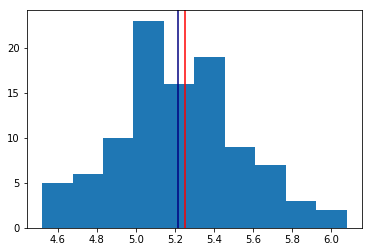

In [58]:
# Let's plot the distribution of sample means and see what's going on as trials
# and sample size change.
trials = 100 # Try 10, 100, 1000
sample_size = 100 # Try 1, 10, 100

sample_stats = make_array()

for trial in np.arange(trials):
    stat = np.mean(simulate(sample_size))
    sample_stats = np.append(sample_stats, stat)
    
plt.hist(sample_stats)
plt.axvline(np.mean(possibilities.column("Score")), c='r')
plt.axvline(np.mean(np.mean(sample_stats)), c='navy')

In [ ]:
# What is the relationship between accuracy and trials?

```
...
```

In [ ]:
# What is the relationship between accuracy and sample size?

```
...
```